In [1]:
import os
import pickle
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

from astropy import units as u 
from astropy.table import Table

from snewpy.neutrino import Flavor, MassHierarchy, MixingParameters
from snewpy.models import Nakazato_2013
from snewpy.models.ccsn import Fornax_2022
from snewpy.models.ccsn import Bollig_2016
from snewpy.models.ccsn import Sukhbold_2015
from snewpy.models.ccsn import Warren_2020
from snewpy.flavor_transformation import AdiabaticMSW, NonAdiabaticMSWH, \
                                         TwoFlavorDecoherence, ThreeFlavorDecoherence, \
                                         NeutrinoDecay, AdiabaticMSWes, NonAdiabaticMSWes
from asteria import set_rcparams
from asteria.simulation import Simulation

%matplotlib inline

C:\Users\sanya\AppData\Local\Temp\ipykernel_101524\2637153084.py:11: FutureWarning: snewpy.models.Nakazato_2013 is moved to snewpy.models.ccsn.Nakazato_2013
  from snewpy.models import Nakazato_2013


**Generate synthetic dataset using Sukhbold M=9.6, EOS=SFHo, NMO**

In [14]:
data_param=list(params for params in Sukhbold_2015.get_param_combinations() if params['progenitor_mass'].value == 27 
                      and params['eos']=='SFHo')

In [15]:
data_model = {'name': 'Sukhbold_2015',
            'param': data_param[0]
              }

In [16]:
data_sim = Simulation(model=data_model,
                     distance=10 * u.kpc, 
                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                     mixing_scheme='AdiabaticMSW',
                     hierarchy='normal')
data_sim.run()


In [24]:
with open("Angle_data_Sukhbold_M=9.6_eos=SFHo_mix=NMO.pkl", 'wb') as f:
    pickle.dump(data_sim, f)

**Prediction datasets: Sukhbold M=9.6, EOS=SFHo; Warren M=9.5, Mixing=1.25; Fornax M=9.5**

In [5]:
pred_sukh_param=list(params for params in Sukhbold_2015.get_param_combinations() if params['progenitor_mass'].value == 27 
                      and params['eos']=='SFHo')

In [6]:
pred_forn_param=list(params for params in Fornax_2022.get_param_combinations() if params['progenitor_mass'].value == 26.99)

In [7]:
pred_warr_param=list(params for params in Warren_2020.get_param_combinations() if params['progenitor_mass'].value == 27
                    and params['turbmixing_param']==1.25)

In [8]:
sukh_model = {'name': 'Sukhbold_2015',
            'param': pred_sukh_param[0]
              }
forn_model = {'name': 'Fornax_2022',
            'param': pred_forn_param[0]
              }
warr_model = {'name': 'Warren_2020',
            'param': pred_warr_param[0]
              }

In [10]:
theta12=[25,40]
sukh_sims=[]
forn_sims=[]
warr_sims=[]

for i,t12 in enumerate(theta12):
    if(i==1):
        pred_sukh = Simulation(model=sukh_model,
                                     distance=10 * u.kpc, 
                                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                                     mixing_scheme='AdiabaticMSW',
                                     mixing_angle=(t12, 8.5*u.deg, 49.2*u.deg),
                                     hierarchy='normal')
        pred_sukh.run()
        with open("Angle_pred_Sukhbold_M=27_eos=SFHo_mix=NMO_t12={}_t13={}.pkl".format(t12,8.5), 'wb') as f:
                pickle.dump(pred_sukh, f)
        sukh_sims.append(pred_sukh)

        pred_forn = Simulation(model=forn_model,
                                     distance=10 * u.kpc, 
                                     Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                                     tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                                     mixing_scheme='AdiabaticMSW',
                                     mixing_angle=(t12, 8.5*u.deg, 49.2*u.deg),
                                     hierarchy='normal')
        pred_forn.run()
        with open("Angle_pred_Fornax_M=26.99_mix=NMO_t12={}_t13={}.pkl".format(t12,8.5), 'wb') as f:
                pickle.dump(pred_forn, f)
        forn_sims.append(pred_forn)
    """
    
    pred_warr = Simulation(model=warr_model,
                                 distance=10 * u.kpc, 
                                 Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                                 tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                                 mixing_scheme='AdiabaticMSW',
                                 mixing_angle=(t12, 8.5*u.deg, 49.2*u.deg),
                                 hierarchy='normal')
    pred_warr.run()
    
    with open("Angle_pred_Warren_M=27_par=1.25_mix=NMO_t12={}_t13={}.pkl".format(t12,8.5), 'wb') as f:
            pickle.dump(pred_warr, f)
    warr_sims.append(pred_warr)
    """

Expect a reduction in performance and increase in simulation run times.


In [11]:
theta12=[25,40]
sukh_sims=[]
forn_sims=[]
warr_sims=[]

for i,t12 in enumerate(theta12):
    with open("Angle_pred_Sukhbold_M=27_eos=SFHo_mix=NMO_t12={}_t13={}.pkl".format(t12,8.5), 'rb') as f:
        pred_sukh=pickle.load(f)
    sukh_sims.append(pred_sukh)

    with open("Angle_pred_Fornax_M=26.99_mix=NMO_t12={}_t13={}.pkl".format(t12,8.5), 'rb') as f:
        pred_forn=pickle.load(f)
    forn_sims.append(pred_forn)

In [57]:
theta12 = np.linspace(28, 37, 10)*u.deg
theta13 = np.linspace(8, 9.1, 10)*u.deg
sims=[]
for i,t12 in enumerate(theta12):
    t13_sims = []
    for j,t13 in enumerate(theta13):
        
        pred_sukh = Simulation(model=sukh_model,
                             distance=10 * u.kpc, 
                             Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                             tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                             mixing_scheme='AdiabaticMSW',
                             mixing_angle=(t12, t13, 49.2*u.deg),
                             hierarchy='normal')
        pred_sukh.run()
        with open("Angle_pred_Sukhbold_M=27_eos=SFHo_mix=NMO_t12={}_t13={}.pkl".format(t12,t13), 'wb') as f:
            pickle.dump(pred_sukh, f)
        t13_sims.append(pred_sukh)
    sims.append(t13_sims)

In [217]:
theta12 = np.linspace(32, 34, 20)*u.deg
theta13 = np.linspace(8, 9.1, 10)*u.deg
sims_reg=[]
for i in range(20):
    pred_sukh = Simulation(model=sukh_model,
                             distance=10 * u.kpc, 
                             Emin=0*u.MeV, Emax=100*u.MeV, dE=1*u.MeV,
                             tmin=-10*u.s,  tmax=10*u.s,    dt=1*u.ms,
                             mixing_scheme='AdiabaticMSW',
                             mixing_angle=(theta12[i], 8.57*u.deg, 49.2*u.deg),
                             hierarchy='normal')
    pred_sukh.run()
    sims_reg.append(pred_sukh)

In [176]:
theta12 = np.linspace(28, 37, 10)*u.deg
theta13 = np.linspace(8, 9.1, 10)*u.deg
sims=[]
thetas=[]
for i,t12 in enumerate(theta12):
    t13_sims = []
    t13_thetas= []
    for j,t13 in enumerate(theta13):
        with open("Angle_pred_Sukhbold_M=27_eos=SFHo_mix=NMO_t12={}_t13={}.pkl".format(t12,t13), 'rb') as f:
            s=pickle.load(f)
        t13_sims.append(s)
        t13_thetas.append((t12.value,t13.value))
    thetas.append(t13_thetas)
    sims.append(t13_sims)

In [142]:
bg = data_sim.detector.i3_bg(dt,size=hits.size) + data_sim.detector.dc_bg(dt,size=hits.size)

In [221]:
datas=[]
dt=50*u.ms
for i in range(100):
    data_sim.rebin_result(dt)
    data_sim.scale_result(5*u.kpc)
    t, hits = data_sim.detector_signal(dt)
    bg1 = data_sim.detector.i3_bg(dt,size=hits.size) + data_sim.detector.dc_bg(dt,size=hits.size)
    sig=bg1+hits
    id1=np.where(t==-5*u.s)[0][0]
    id2=np.where(t==-.5*u.s)[0][0]
    #id3=np.where(t==5*u.s)[0][0]
    #id4=np.where(t==10*u.s)[0][0]
    id5=np.where(t==.05*u.s)[0][0]
    id6=np.where(t==1*u.s)[0][0]
    
    mean_under=np.mean(sig[id1:id2])
    datas.append(np.subtract(sig,mean_under)[id5:id6])


In [220]:
dt=50*u.ms
data_sim.rebin_result(dt)
data_sim.scale_result(5*u.kpc)
t, hits = data_sim.detector_signal(dt)
sig=bg+hits
id1=np.where(t==-5*u.s)[0][0]
id2=np.where(t==-.5*u.s)[0][0]
#id3=np.where(t==5*u.s)[0][0]
#id4=np.where(t==10*u.s)[0][0]
id5=np.where(t==.05*u.s)[0][0]
id6=np.where(t==1*u.s)[0][0]

mean_under=np.mean(sig[id1:id2])
data_hits=np.subtract(sig,mean_under)[id5:id6]

In [156]:

hits_sukh=[]
hits_forn=[]
hits_warr=[]
dt=50*u.ms
for i in range(2):
    sukh_sims[i].rebin_result(dt)
    sukh_sims[i].scale_result(10*u.kpc)
    t, hits = sukh_sims[i].detector_signal(dt)
    id5=np.where(t==.05*u.s)[0][0]
    id6=np.where(t==1*u.s)[0][0]
    data=hits[id5:id6]
    hits_sukh.append(data)
    
    forn_sims[i].rebin_result(dt)
    forn_sims[i].scale_result(10*u.kpc)
    t, hits = forn_sims[i].detector_signal(dt)
    id5=np.where(t==.05*u.s)[0][0]
    id6=np.where(t==1*u.s)[0][0]
    data=hits[id5:id6]
    hits_forn.append(data)

In [219]:

hits_sukh_20=[]
dt=50*u.ms
for i in range(20):
    sims_reg[i].rebin_result(dt)
    sims_reg[i].scale_result(5*u.kpc)
    t, hits = sims_reg[i].detector_signal(dt)
    id5=np.where(t==.05*u.s)[0][0]
    id6=np.where(t==1*u.s)[0][0]
    data=hits[id5:id6]
    hits_sukh_20.append(data)
    

Text(0.5, 1.0, 'Signal for Models with M=27, EOS=SFHo, d=10kpc, 50ms binning')

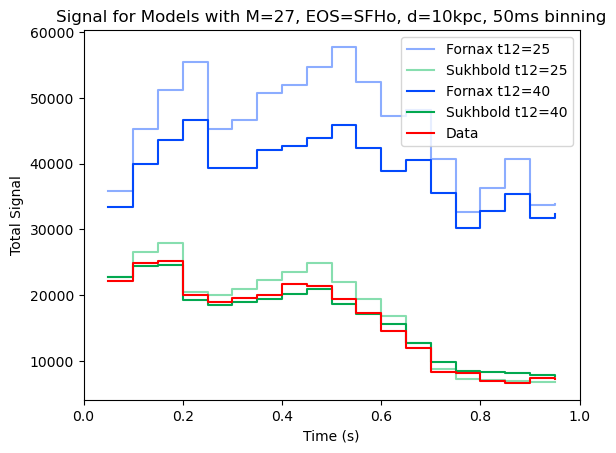

In [164]:
#dt = 10 * u.ms
colors_forn=['#8cadff','#0349fc']
colors_sukh=['#87deaf','#02a84f']
labels=['Data','Prediction']
theta12=[25,40]


for i in range(2):
    plt.step(t[id5:id6], hits_forn[i], where='post',color=colors_forn[i],label=f'Fornax t12={theta12[i]}')
    plt.step(t[id5:id6], hits_sukh[i], where='post',color=colors_sukh[i],label=f'Sukhbold t12={theta12[i]}')

plt.step(t[id5:id6], data_hits,color='red',label='Data',where='post')

plt.legend(loc='upper right')
plt.xlim(0,1)
#plt.ylim(0,1.1e6)
plt.xlabel('Time (s)')
plt.ylabel('Total Signal')
plt.title('Signal for Models with M=27, EOS=SFHo, d=10kpc, 50ms binning')

Text(0.5, 1.0, 'Sukhbold Prediction with M=27, EOS=SFHo, d=1kpc, theta_12 from 30 to 36')

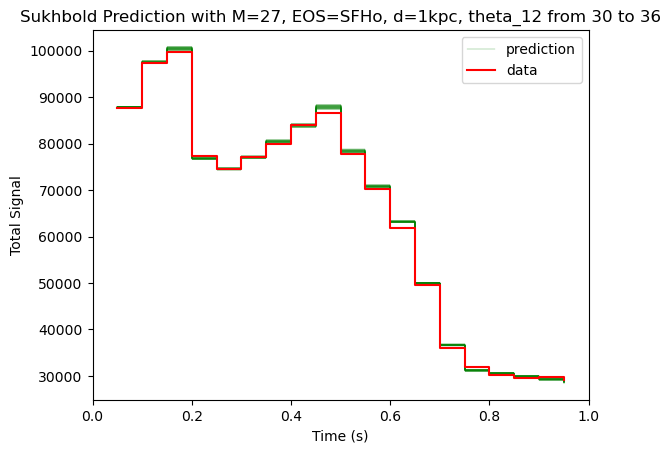

In [222]:
dt = 50 * u.ms
colors=['blue','red']
labels=['Data','Prediction']

for i in range(20):
    if i==0:
        plt.step(t[id5:id6], hits_sukh_20[i], where='post',lw=.2,color='green',label='prediction')
    else:
        plt.step(t[id5:id6], hits_sukh_20[i], where='post',lw=.2,color='green')
    

plt.step(t[id5:id6], data_hits,color='red',label='data',where='post')

plt.legend()
plt.xlim(0,1)
plt.xlabel('Time (s)')
plt.ylabel('Total Signal')
plt.title('Sukhbold Prediction with M=27, EOS=SFHo, d=1kpc, theta_12 from 30 to 36')

Text(0.5, 1.0, 'Sukhbold Prediction with M=27, EOS=SFHo, d=10kpc, theta_12 from 30 to 36')

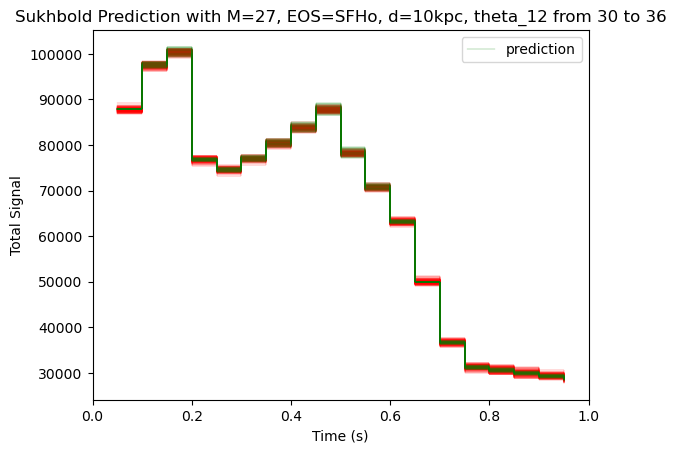

In [203]:
dt = 50 * u.ms
colors=['blue','red']
labels=['Data','Prediction']

for i in range(100):
    plt.step(t[id5:id6], datas[i],color='red',where='post',lw=.2)

theta12 = np.linspace(30, 36, 20)*u.deg
for i in range(20):
    if i==0:
        plt.step(t[id5:id6], hits_sukh_20[i], where='post',lw=.2,color='green',label='prediction')
    else:
        plt.step(t[id5:id6], hits_sukh_20[i], where='post',lw=.2,color='green')
    


plt.legend()
plt.xlim(0,1)
plt.xlabel('Time (s)')
plt.ylabel('Total Signal')
plt.title('Sukhbold Prediction with M=27, EOS=SFHo, d=10kpc, theta_12 from 30 to 36')

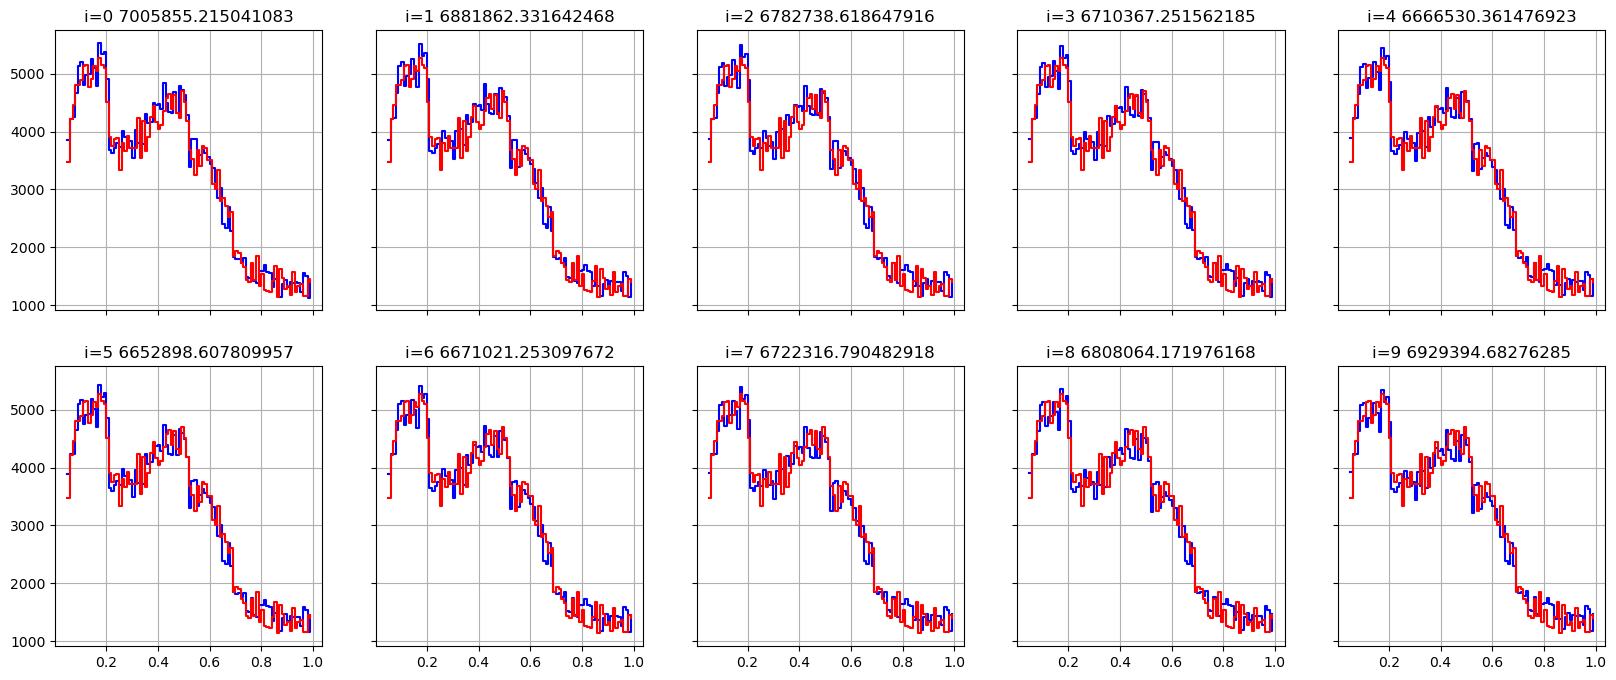

In [164]:
fig, axes = plt.subplots(2, 5, figsize=(20, 8), sharex=True, sharey=True)

axes = axes.flatten()

for i in range(10):
    ax = axes[i]
    ax.step(t[id5:id6], hits_tot1[i][2], where='post',color='blue')
    ax.step(t[id5:id6], data_hits,color='red',where='post')
    ax.set_title('i={} {}'.format(i,np.sum((hits_tot1[i][2]-data_hits)**2)))
    ax.grid(True)
    

In [231]:

chi_sqs_reg=[]
stdevs=[]
for i in range(20):
    trials=[]
    for j in range(100):
        chi=compute_chi_sq(hits_sukh_20[i],datas[j])
        trials.append(chi)
    chi_sqs_reg.append(np.median(trials))
    stdevs.append(np.std(trials))

In [227]:

chi_sqs_reg=[]
for i in range(20):
    chi=compute_chi_sq(hits_sukh_20[i],data_hits)
    chi_sqs_reg.append(chi)

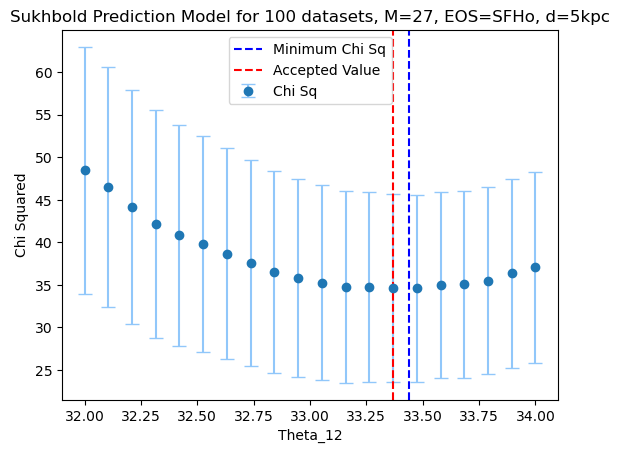

In [233]:
theta12 = np.linspace(32, 34, 20)
plt.errorbar(theta12,chi_sqs_reg,yerr=stdevs, fmt='o', ecolor='#91c7fa', capsize=5,label='Chi Sq')
plt.axvline(x=33.44, color='blue', linestyle='--',label='Minimum Chi Sq')
plt.axvline(x=theta12[np.argmin(chi_sqs_reg)], color='r', linestyle='--',label='Accepted Value')
plt.xlabel('Theta_12')
plt.ylabel('Chi Squared')
plt.title('Sukhbold Prediction Model for 100 datasets, M=27, EOS=SFHo, d=5kpc')
plt.legend()

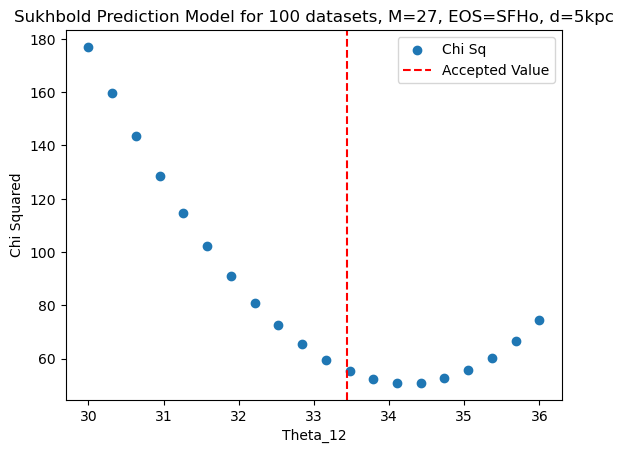

In [216]:
plt.scatter(theta12,chi_sqs_reg,label='Chi Sq')
plt.axvline(x=33.44, color='r', linestyle='--',label='Accepted Value')
plt.xlabel('Theta_12')
plt.ylabel('Chi Squared')
plt.title('Sukhbold Prediction Model for 100 datasets, M=27, EOS=SFHo, d=5kpc')
plt.legend()

In [20]:
plt.scatter(theta12,chi_sqs_reg,label='Chi Sq')
plt.axvline(x=33.44, color='r', linestyle='--',label='Accepted Value')
plt.xlabel('Theta_12')
plt.ylabel('Chi Squared')
plt.title('Sukhbold Prediction Model, M=27, EOS=SFHo, d=1kpc')
plt.legend()

[1108.1322138888856,
 1108.1322138888856,
 1108.1322138888856,
 1108.1322138888856,
 1108.1322138888856,
 1108.1322138888856,
 1108.1322138888856,
 1108.1322138888856,
 1108.1322138888856,
 1108.1322138888856]

In [184]:
thetas=np.array(thetas)
thetas[0,:]

array([[28.        ,  8.        ],
       [28.        ,  8.12222222],
       [28.        ,  8.24444444],
       [28.        ,  8.36666667],
       [28.        ,  8.48888889],
       [28.        ,  8.61111111],
       [28.        ,  8.73333333],
       [28.        ,  8.85555556],
       [28.        ,  8.97777778],
       [28.        ,  9.1       ]])

In [114]:
compute_chi_sq(hits_tot1[8][5],hits_tot[0])

62835350.180338636

In [76]:
def compute_chi_sq(pred,dat):
    chi_sq=0
    for i in range(len(pred)):
        chi_sq= chi_sq+ ((pred[i]-dat[i])**2)/(pred[i]+dat[i])
        #chi_sq= chi_sq+ ((pred[i]-dat[i])**2)
    return chi_sq

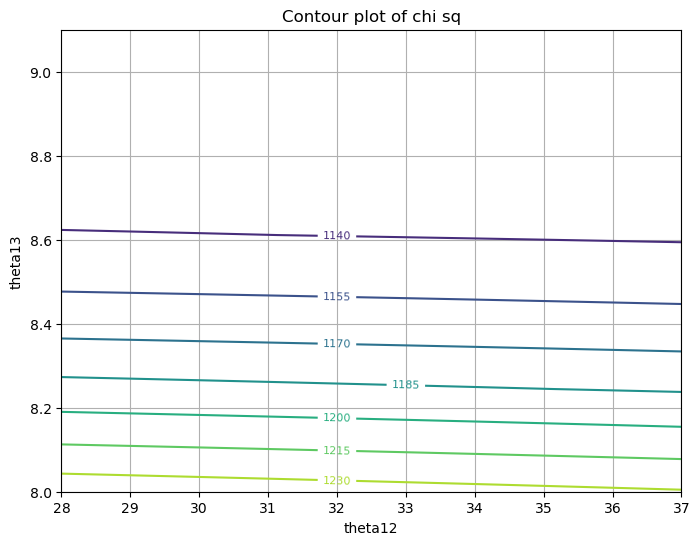

In [59]:
theta12 = np.linspace(28, 37, 10)
theta13 = np.linspace(8, 9.1, 10)

plt.figure(figsize=(8, 6))

#levels = np.linspace(np.min(chi_sqs), np.max(chi_sqs), 10)
contour = plt.contour(theta12, theta13, chi_sqs,levels=10)
plt.clabel(contour, inline=True, fontsize=8)
plt.xlabel('theta13')
plt.ylabel('theta12')
plt.title('Contour plot of chi sq')
plt.grid(True)
plt.show()

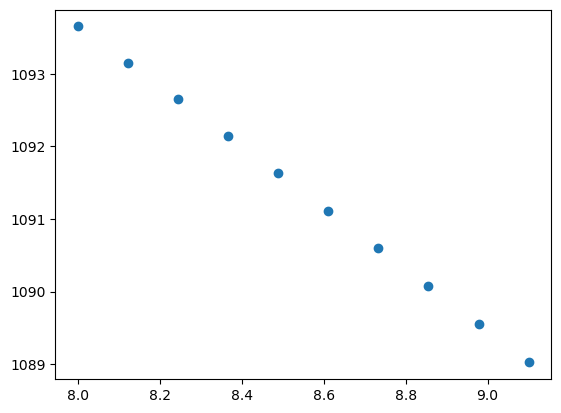

In [35]:
chi_sqs=np.array(chi_sqs)
chi_sq_12=chi_sqs[1,:]
plt.scatter(theta13, chi_sq_12)

In [56]:
chi_sq_13=chi_sqs[:,5]
plt.scatter(theta12, chi_sq_13)

TypeError: list indices must be integers or slices, not tuple